In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)  


![image](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F377651%2Fb0beb1ac-9b3b-dd67-0af0-ebbacc73323a.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=bb190bfd39734cf95e3d5be8865181e3)

In [ ]:
def predict(w, x):
    # 線形モデルを関数に分けておくと、可視化や評価での再利用が容易
    a, b = w
    return a * x + b

def grad(sample, w):
    a, b = w
    x, y = sample
    err = y - (a * x + b)
    # なぜ: 勾配符号を一貫させ、更新式 w -= alpha * grad が直感的になるようにする
    da = -2 * x * err
    db = -2 * err
    return np.array([da, db], dtype=float)

def mse_loss(pred, target, reduction="mean"):
    diff = target - pred
    val = diff * diff
    if reduction == "mean":
        return np.mean(val)
    elif reduction == "sum":
        return np.sum(val)
    else:
        return val

def sgd_epoch(grad_fn, samples, w, alpha):
    # 1エポックを関数に分離し、ロジックの重複や副作用を局所化する
    for sample in samples:
        w = w - alpha * grad_fn(sample, w)
    return w

def evaluate_loss(w, samples):
    # 評価は更新と分離し、計測の順序や集計を安定させる
    xs = samples[:, 0]
    ys = samples[:, 1]
    preds = predict(w, xs)
    return mse_loss(preds, ys, reduction="mean")


In [ ]:
a_true = 5.0
b_true = -4.0

xs = np.arange(-1.0, 1.0, 0.01)
noise = np.random.normal(0.0, 1.0, size=xs.shape)
ys = a_true * xs + b_true + noise
samples = np.stack([xs, ys], axis=1)
np.random.shuffle(samples)  # SGD の順序依存を緩和し、局所的な偏りを避ける
samples[:5]


array([[-0.83      , -7.83575267],
       [-0.21      , -7.03756891],
       [ 0.04      , -3.96128571],
       [ 0.74      , -0.0233092 ],
       [ 0.48      , -1.07805843]])

In [12]:
alpha = 0.01  # 学習率
epochs = 50

w = np.array([0.0, 0.0], dtype=float)

loss_history = []
for ep in range(epochs):
    w = sgd_epoch(grad, samples, w, alpha)
    loss = evaluate_loss(w, samples)
    loss_history.append(loss)
w, loss_history[-1]


(array([ 5.10670761, -4.14270858]), np.float64(0.8685795955754019))

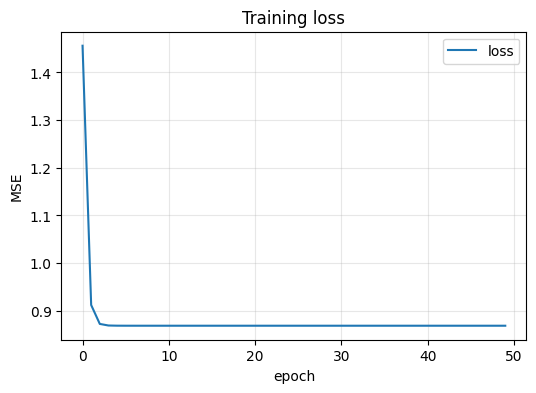

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(loss_history, label="loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Training loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


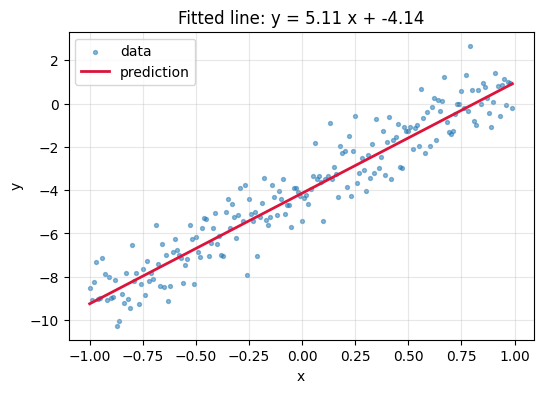

In [14]:
# 散布図と最終予測の直線を重ねて表示
x_grid = np.linspace(xs.min(), xs.max(), 200)
y_pred_line = predict(w, x_grid)

plt.figure(figsize=(6, 4))
plt.scatter(samples[:, 0], samples[:, 1], s=8, alpha=0.5, label="data")
plt.plot(x_grid, y_pred_line, color="crimson", linewidth=2, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Fitted line: y = {w[0]:.2f} x + {w[1]:.2f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
